In [2]:
!pip install tensorflow scikit-learn matplotlib


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


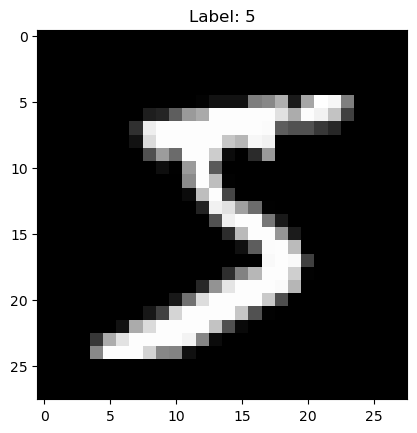

In [5]:
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()


In [6]:
model = Sequential([
    Flatten(input_shape=(28,28)),     # Flatten 28x28 -> 784
    Dense(128, activation='relu'),    # Hidden layer
    Dense(10, activation='softmax')   # Output layer (10 classes)
])


C:\Users\Adrika Banerjee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)



Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9209 - loss: 0.2755 - val_accuracy: 0.9662 - val_loss: 0.1262
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9646 - loss: 0.1198 - val_accuracy: 0.9733 - val_loss: 0.0914
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9764 - loss: 0.0805 - val_accuracy: 0.9752 - val_loss: 0.0812
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9811 - loss: 0.0606 - val_accuracy: 0.9757 - val_loss: 0.0815
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9863 - loss: 0.0455 - val_accuracy: 0.9767 - val_loss: 0.0826


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.2f}")


313/313 - 2s - 5ms/step - accuracy: 0.9770 - loss: 0.0710

✅ Test accuracy: 0.98


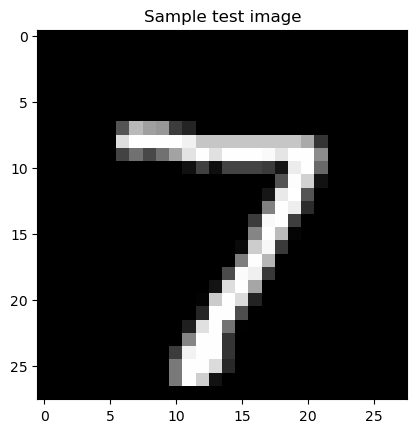

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted label: 7
Actual label: 7


In [10]:
image = x_test[0]
plt.imshow(image, cmap="gray")
plt.title("Sample test image")
plt.show()

pred = model.predict(np.expand_dims(image, axis=0))
print("Predicted label:", pred.argmax())
print("Actual label:", y_test[0])


In [12]:
# Save trained model
model.save("mnist_dense.keras")
print("Model saved as mnist_dense.h5")


Model saved as mnist_dense.h5
